WASP_17b_flux_vs_flux_sap.ipynb

In [1]:
import astropy
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as tck


In [2]:
TIC = 'TIC 66818296' #WASP-17 / TIC 66818296
search_result = lk.search_lightcurve(
        target=TIC,
        mission='TESS', author='SPOC')
lc_collection = search_result.download_all()
# lc = lc_collection.stitch(corrector_func=lambda x: x.
#                           remove_nans().normalize(unit='unscaled'))



In [3]:
print(lc_collection)

LightCurveCollection of 2 objects:
    0: <TessLightCurve LABEL="TIC 66818296" SECTOR=12 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 66818296" SECTOR=38 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>


In [4]:
lc = lc_collection[0]
lc = lc.normalize()

In [5]:
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1624.9610687762238,———,———,5.7520936e-03,286200,1734.70083,254.40905,5.6597529e+03,2.7077772e+01,3.6572070e+04,1.5797379e+01,———,———,11000000000000,———,———,———,———,1734.70083,3.8966534e-03,254.40905,3.8714281e-03,———,———
1624.9624576649871,———,———,5.7520941e-03,286201,1734.69689,254.41390,5.6882363e+03,2.7163750e+01,3.6803297e+04,1.5849596e+01,———,———,11000000000000,———,———,———,———,1734.69689,3.8878899e-03,254.41390,3.8652457e-03,———,———
1624.9638465532857,———,———,5.7520941e-03,286202,1734.70053,254.41119,5.7022017e+03,2.7244625e+01,3.7047914e+04,1.5897677e+01,———,———,11000000000000,———,———,———,———,1734.70053,3.8902559e-03,254.41119,3.8693140e-03,———,———
1624.9652354420496,———,———,5.7520946e-03,286203,1734.70903,254.39842,5.6822319e+03,2.7329166e+01,3.7323707e+04,1.5950985e+01,———,———,11000000000000,———,———,———,———,1734.70903,3.9179092e-03,254.39842,3.8951968e-03,———,———
1624.9666243303482,———,———,5.7520946e-03,286204,1734.69178,254.41453,5.6716797e+03,2.7416311e+01,3.7592102e+04,1.6006865e+01,———,———,11000000000000,———,———,———,———,1734.69178,3.9340523e-03,254.41453,3.9140377e-03,———,———
1624.968013219112,———,———,5.7520950e-03,286205,1734.70877,254.40047,5.6360112e+03,2.7488678e+01,3.7820887e+04,1.6066200e+01,———,———,11000000000000,———,———,———,———,1734.70877,3.9713173e-03,254.40047,3.9468603e-03,———,———
1624.9694021074106,———,———,5.7520950e-03,286206,1734.70031,254.41046,5.6659849e+03,2.7556246e+01,3.8013035e+04,1.6101604e+01,———,———,11000000000000,———,———,———,———,1734.70031,3.9587538e-03,254.41046,3.9384109e-03,———,———
1624.9707909961744,———,———,5.7520955e-03,286207,1734.70983,254.39945,5.6488721e+03,2.7615194e+01,3.8208195e+04,1.6145405e+01,———,———,11000000000000,———,———,———,———,1734.70983,3.9820271e-03,254.39945,3.9563859e-03,———,———


In [6]:
# fig = plt.figure(figsize=(10,4))

# lc_bin = lc.bin(time_bin_size = 0.05) # Default time is in days
# plt.errorbar(lc_bin.time.mjd-lc_bin.time[0].mjd, lc_bin.flux, lc_bin.flux_err, fmt='.', ecolor='LightGrey')

# # plt.title("PDCSAP")
# plt.xlabel('Time [days]')
# plt.ylabel('Normalized Flux')
# plt.show()

In [7]:
# fig = plt.figure(figsize=(10,4))

# lc_bin = lc.bin(time_bin_size = 0.05) # Default time is in days
# plt.errorbar(lc_bin.time.mjd-lc_bin.time[0].mjd, lc_bin.sap_flux, lc_bin.sap_flux_err, fmt='.', ecolor='LightGrey')

# plt.title("SAP flux")
# plt.xlabel('Time [days]')
# plt.ylabel('Normalized Flux')
# plt.show()

In [8]:
# #PDCSAP Flux
# lc = lc.flatten()

# lc_bin = lc.bin(time_bin_size = 0.05) # Default time is in days
# plt.errorbar(lc_bin.time.mjd-lc_bin.time[0].mjd, lc_bin.flux, lc_bin.flux_err, fmt='.', ecolor='LightGrey')
# #
# plt.title("")
# plt.xlabel('Time [days]')
# plt.ylabel('Normalized Flux')
# plt.show()

In [9]:
# fig = plt.figure(figsize=(10,4))

# lc_bin = lc.bin(time_bin_size = 0.05) # Default time is in days
# plt.errorbar(lc_bin.time.mjd-lc_bin.time[0].mjd, lc_bin.flux, lc_bin.flux_err, fmt='.', ecolor='LightGrey')

# plt.xlim(5.4, 5.8)
# plt.xlabel('Time [days]')
# plt.ylabel('Normalized Flux')
# plt.show()

In [10]:
help(lk.lightcurve)

Help on module lightkurve.lightcurve in lightkurve:

NAME
    lightkurve.lightcurve - Defines LightCurve, KeplerLightCurve, and TessLightCurve.

CLASSES
    astropy.timeseries.sampled.TimeSeries(astropy.timeseries.core.BaseTimeSeries)
        LightCurve
            FoldedLightCurve
            KeplerLightCurve
            TessLightCurve
    
    class FoldedLightCurve(LightCurve)
     |  FoldedLightCurve(data=None, *args, time=None, flux=None, flux_err=None, **kwargs)
     |  
     |  Subclass of `LightCurve` in which the ``time`` parameter represents phase values.
     |  
     |  Compared to the `~lightkurve.lightcurve.LightCurve` base class, this class
     |  has extra meta data entries (``period``, ``epoch_time``, ``epoch_phase``,
     |  ``wrap_phase``, ``normalize_phase``), an extra column (``time_original``),
     |  extra properties (``phase``, ``odd_mask``, ``even_mask``),
     |  and implements different plotting defaults.
     |  
     |  Method resolution order:
     |    

In [11]:
lc_PDCSAP_flux = np.array(lc.flux)
lc_time = np.array(lc.time.btjd)
lk_SAP_flux = lk.LightCurve(time=lc_time, flux=np.array(lc.sap_flux.value))
lk_SAP_flux = lk_SAP_flux.normalize()
lc_SAP_flux = np.array(lk_SAP_flux.flux.value)


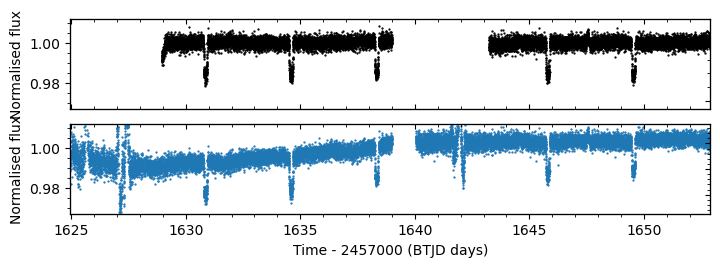

In [15]:
#Panel settings
left = 0.1
bottom = 0.1
width = 0.8
height = 0.3
sep = 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom-height-sep, width, height]

fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes(rect1)
ax2 = fig.add_axes(rect2)


"""
ax1
"""
ax1.scatter(lc_time, lc_PDCSAP_flux, label='PDCSAP Flux', color='black', s=0.4)

ax1.set_xticklabels([])
ax1.tick_params(axis="x", which="both", direction="in")
ax1.set_ylabel("Normalised \n flux")
# ax1.set_yticks(size=fontsize)
ax1.set_xlim(min(lc_time), max(lc_time))

# Mirror y
ax1y = ax1.twinx()
ax1y.set_ylim(ax1.get_ylim())
ax1y.get_yaxis().set_ticklabels([])
ax1y.tick_params(which="both", direction="in")

# Mirror x
ax1x = ax1.twiny()
ax1x.set_xlim(ax1.get_xlim())
ax1x.get_xaxis().set_ticklabels([])
ax1x.tick_params(which="both", direction="in")

ax1x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1y.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.yaxis.set_minor_locator(tck.AutoMinorLocator())

"""
ax2
"""
ax2.scatter(lc_time, lc_SAP_flux, label='SAP Flux', s=0.4)
ax2.set_ylabel("Normalised flux")
ax2.set_xlabel("Time - 2457000 (BTJD days)")
ax2.set_xlim(ax1.get_xlim())

# Mirror y
ax2y = ax2.twinx()
ax2y.set_ylim(ax2.get_ylim())
ax2y.get_yaxis().set_ticklabels([])
ax2y.tick_params(which="both", direction="in")

# Mirror x
ax2x = ax2.twiny()
ax2x.set_xlim(ax2.get_xlim())
ax2x.get_xaxis().set_ticklabels([])
ax2x.tick_params(which="both", direction="in")

ax2x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax2y.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax2.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax2.yaxis.set_minor_locator(tck.AutoMinorLocator())

ax1.set_ylim(0.967, 1.012)
ax2.set_ylim(0.967, 1.012)

plt.subplots_adjust(hspace=0)
plt.show()

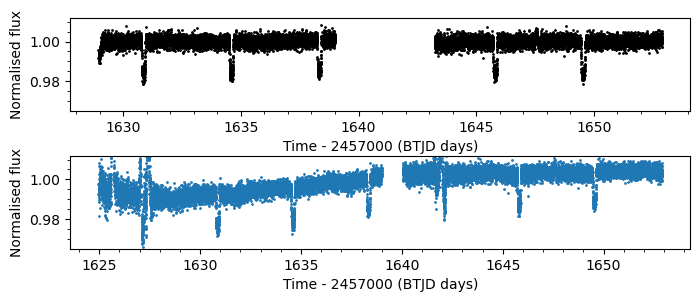

In [13]:
fig, axs = plt.subplots(2, figsize=(8, 3))
yes = lc.scatter(label='PDCSAP Flux', ax=axs[0], normalize=True, ylabel="Normalised flux", color='black')
lc.scatter(column='sap_flux', ax=axs[1], normalize=True, label='SAP Flux', ylabel="Normalised flux")
axs[0].set_ylim(0.965, 1.012)
axs[1].set_ylim(0.965, 1.012)

axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[0].set_xlabel("Time - 2457000 (BTJD days)")
axs[1].set_xlabel("Time - 2457000 (BTJD days)")

axs[0].xaxis.set_minor_locator(tck.AutoMinorLocator())
axs[1].xaxis.set_minor_locator(tck.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(tck.AutoMinorLocator())
axs[1].yaxis.set_minor_locator(tck.AutoMinorLocator())

fig.subplots_adjust(hspace=0.48)
plt.show()

As seen in the figure above. There is a short term trend on SAP flux. PDCSAP appears to not have any short-term trends. .flatten() has not been applied.

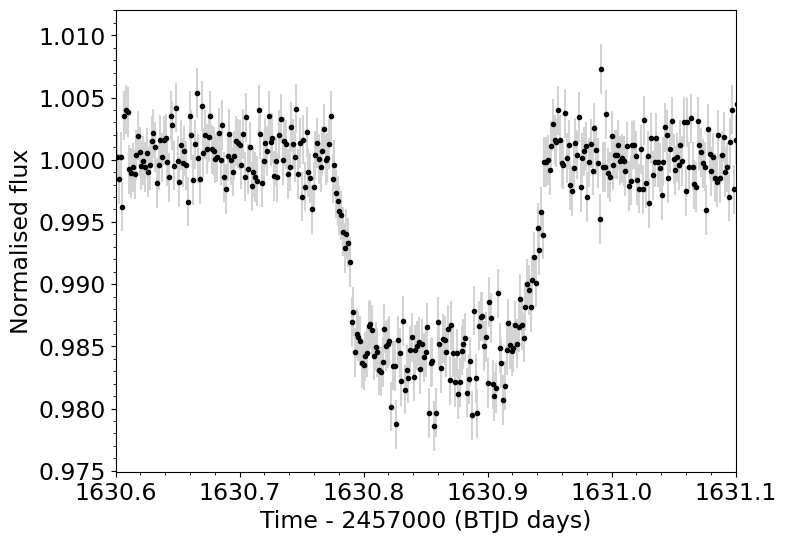

In [17]:
lc_f = lc.flatten()
lc_bin = lc_f.bin(time_bin_size = 0.006944444) # Default time is in days

fig, ax = plt.subplots(1, figsize=(8,6))
plt.errorbar(np.array(lc.time.btjd), np.array(lc.flux), np.array(lc.flux_err), fmt='.', color='Black', ecolor='LightGrey')


plt.ylabel("Normalised flux", size=17)
plt.xlabel("Time - 2457000 (BTJD days)", size=17)
plt.xlim(1630.6, 1631.1)

ax.xaxis.set_tick_params(labelsize=17)
ax.yaxis.set_tick_params(labelsize=17)

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()
